In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),
    ])


In [4]:
# Print the model summary
model.weights


[<tf.Variable 'dense/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.07377   , -0.07873496,  0.07075869, ...,  0.07046068,
          0.01030989, -0.06042414],
        [-0.07619191,  0.03376689,  0.05446407, ..., -0.02695136,
          0.00714944, -0.02091543],
        [-0.06533368, -0.00313417,  0.07837054, ...,  0.03585822,
          0.03926142,  0.01850895],
        ...,
        [-0.01406677,  0.02397352,  0.00846215, ...,  0.0164817 ,
          0.06463613,  0.07899502],
        [-0.0465228 ,  0.00892588, -0.08043806, ..., -0.04684858,
          0.05351993,  0.01984597],
        [ 0.05708559,  0.05201074,  0.04605927, ..., -0.03068979,
          0.07934047,  0.05755544]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.04246685, -0.08966914, -0.16994515,  0.2739145

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='Softmax')
])

In [8]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
mae = tf.keras.metrics.MeanAbsoluteError()
acc= tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc,mae])

In [10]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [13]:
# Print the shape of the training data

train_images, train_labels.shape

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [14]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [15]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255
test_images  = test_images / 255

In [16]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

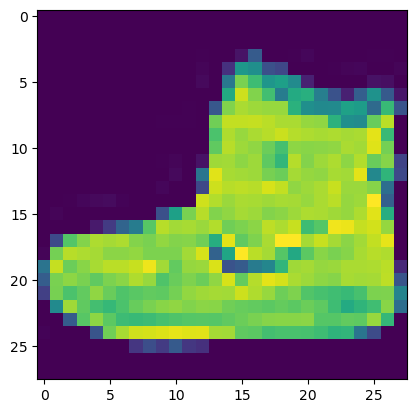

label: Ankle boot


In [16]:
# Display one of the images
i=0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


In [17]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

#### Fit the model

In [18]:
# Fit the model

from tabnanny import verbose


history = model.fit(train_images[...,np.newaxis],train_labels, epochs=10, batch_size=256,verbose=2)

Epoch 1/10


KeyboardInterrupt: 

#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.301846,0.891783,4.419999
1,0.292395,0.894667,4.420001
2,0.285780,0.898333,4.419999
3,0.278497,0.900383,4.420001
4,0.273474,0.901433,4.420001


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

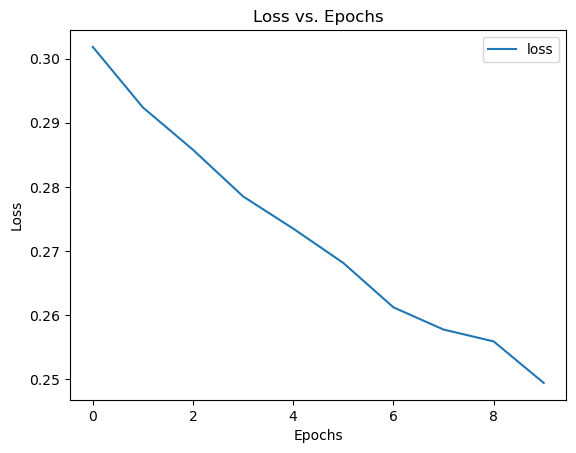

In [ ]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend='False')
loss_plot.set(xlabel='Epochs', ylabel='Loss')


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

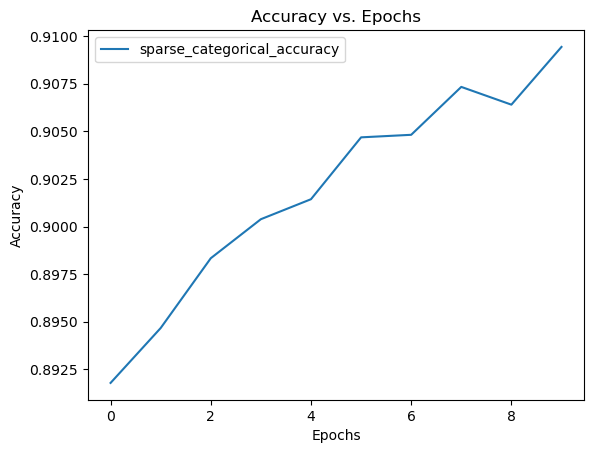

In [ ]:
# Make a plot for the accuracy

acc_plot = df.plot(y='sparse_categorical_accuracy', title='Accuracy vs. Epochs', legend='False')
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Error')]

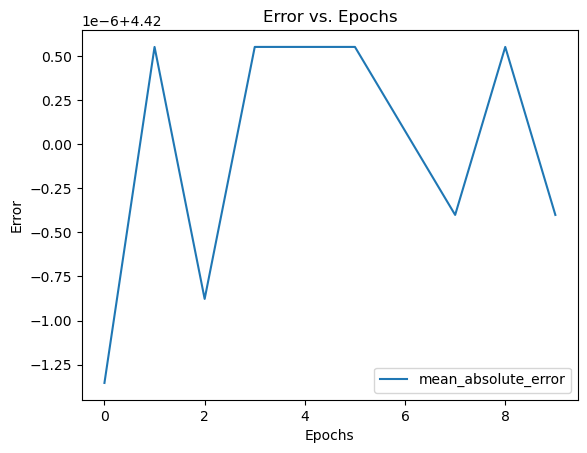

In [ ]:
# Make a plot for the additional metric
err_plot = df.plot(y='mean_absolute_error', title='Error vs. Epochs', legend='False')
err_plot.set(xlabel='Epochs', ylabel='Error')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2963 - sparse_categorical_accuracy: 0.8971 - mean_absolute_error: 4.4200


#### Make predictions from the model

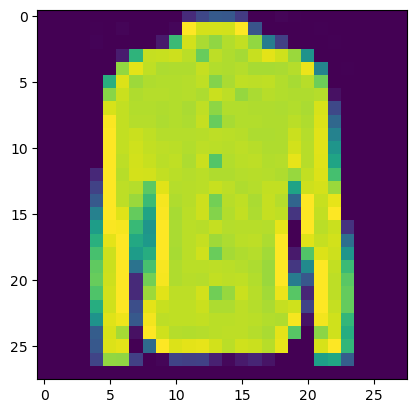

Label: Shirt


In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])

1/1 [==============================] - 0s 14ms/step


In [ ]:
print(f'Model predction: {labels[np.argmax(pred)]}')

Model predction: Shirt
